# Universidad de Colima
## Facultad de Ingeniería Mecánica y Eléctrica 
### Ingeniería en Computación Inteligente 
#### Análisis y Visualización de Datos
### Análisis del Dataset RMS Titanic 
#### Presenta:
### Carlos Isaac Tapia González
*Coquimatlán, Colima 12 de Febrero de 2026*

1. Introduccion 

El RMS Titanic fue un lujoso transatlántico británico, considerado el objeto móvil más grande y "insumergible" de su época, que se hundió en su viaje inaugural el 15 de abril de 1912 tras chocar con un iceberg en el Atlántico Norte. La tragedia, que cobró más de 1500 vidas de 2240 pasajeros y tripulantes, marcó un hito en la seguridad marítima mundial. 

![^1](imagentitanic.jpg)

Fig. 1 Fotografia del Barco RMS Titanic (fuente: https://psicologiaymente.com/reflexiones/frases-titanic)

En este documento se describe el anàliss aplicando tecnicas de ciencia de datos del dataset Titanic

 1. Definir la ubicacion de los dataset que utilizaremos en este análisis 

    Identificar los formatos y las fuenstes confiables de los datos que utilizaremos. Cuidar si tengo la autorizacion de los propietarios de los datos para utilizarlos y difundirlos (publicarlos).

In [63]:
"""
Importar las librerias
Pandas: para el manejo de los datos, dataframe: similiar a una hoja excel
Numpay: para tratamiento de datos numéricos, array: similiar a una lista
Matplotlib.pyplot: para la visualización de datos, graficos
Seaborn: para la visualización de datos, graficos estadísticos, mayor facilidad para crear gráficos estadísticos
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Cargar el Dataset

In [48]:
df = pd.read_csv('datasetTitanic.csv')

In [49]:
# Desplegar las primeras cinco filas del dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [50]:
# Desplegar las últimas cinco filas del dataframe
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [51]:
# Desplegar el nombre de las columnas 
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [52]:
##diccionario de datos del dtaset Titanic 

In [ ]:
# Desplegar información general del dataframe, incluyendo el número de filas, columnas, tipos de datos y valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [54]:
#numero de filas y columnas del dtaset 
df.shape

(418, 12)

### Estadisticas Básicas del Dataset
#### EDA: Análisis Exploratorio de los Datos 

In [55]:
#Estadisticas Básicas del Dataset 
#Localiza las columnas numéricas (cuantitativas)
df.describe()   

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [56]:
#Calcular las estadisticas de tendencia central de una columna numérica 
#Tomaremos la columna edad : age
#El pasajero de menor edad en la columna age
print("El pasajero de menor edad tiene: {} años".format(df['Age'].min()))
print("El pasajero de mayor edad tiene: {} años".format(df['Age'].max()))
#Calcuar el promedio del campo age 
#No podemos por que no tenemos los registros completos,nos faltan 86 registros 
#Saber cuantos registros son nulos
print("Numeros de registros nulos en la columna edad: {} del total: {}".format(df['Age'].isnull().sum(), df['Age'].count()))
#Rellenar los registros faltantrdmde la columna age
df['Age'].fillna(df['Age'].median(), inplace=True)
print("La edad promedio de los pasajeros del Titanic es: {:.2f} años".format(df['Age'].mean()))
print("la edad qeu mas se repite entre los pasajeros del Titanic es: {} años".format(df['Age'].mode()[0]))
print("La desviacion estandar de la edad de los pasajeros del Titanic es: {:.2f} años".format(df['Age'].std()))
print("La varianza de la edad de los pasajeros del Titanic es: {:.2f} años".format(df['Age'].var()))
#Cantos pasajeros sobrevivieron al naufragio del Titanic, ver el campo Survived, 1: sobrevivio, 0: no sobrevivio
#contar los registros usando la condicion de = 1
print("El numero de pasajeros que sobrevivieron al naufragio del Titanic es: {}".format(df['Survived'].sum()))
#Numero de sobrevivientes mujeres: operador and usar el campo Sex==female
print("El numero de mujeres que sobrevivieron al naufragio del Titanic es: {}".format(df[(df['Survived'] == 1) & (df['Sex'] == 'female')]['Survived'].count()))
#Numero de sobrevivientes hombres: operador
print("El numero de hombres que sobrevivieron al naufragio del Titanic es: {}".format(df[(df['Survived'] == 1) & (df['Sex'] == 'male')]['Survived'].count()))


El pasajero de menor edad tiene: 0.17 años
El pasajero de mayor edad tiene: 76.0 años
Numeros de registros nulos en la columna edad: 86 del total: 332
La edad promedio de los pasajeros del Titanic es: 29.60 años
la edad qeu mas se repite entre los pasajeros del Titanic es: 27.0 años
La desviacion estandar de la edad de los pasajeros del Titanic es: 12.70 años
La varianza de la edad de los pasajeros del Titanic es: 161.39 años
El numero de pasajeros que sobrevivieron al naufragio del Titanic es: 152
El numero de mujeres que sobrevivieron al naufragio del Titanic es: 152
El numero de hombres que sobrevivieron al naufragio del Titanic es: 0


/tmp/ipykernel_121489/1765921551.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [ ]:
#Crear la varaible famili size
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
#Eliminar la columna Cabin por que tiene muchos valores nulos
df.drop(columns=['Cabin'], inplace=True, errors='ignore')

In [59]:
#Step 3: Crear la varaible famili size 
# Crear FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Crear IsAlone
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

print(df[['FamilySize','IsAlone']].head())


   FamilySize  IsAlone
0           1        1
1           2        0
2           1        1
3           1        1
4           3        0


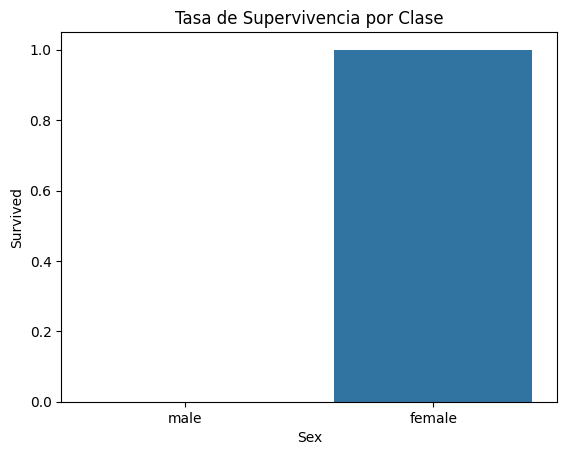

In [ ]:
#Visualizar la relación entre la edad y la supervivencia, usando un gráfico de caja (boxplot)
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Tasa de Supervivencia por Clase')
plt.show()


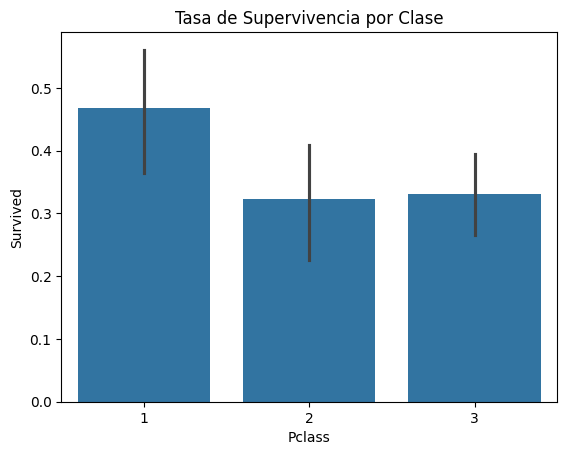

In [ ]:
#Visualizar la relación entre la edad y la supervivencia, usando un gráfico de caja (boxplot)
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Tasa de Supervivencia por Clase')
plt.show()

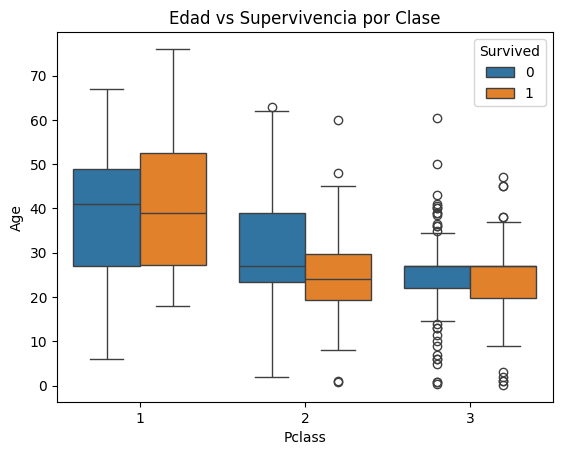

In [ ]:
#Visualizar la relación entre la edad y la supervivencia, usando un gráfico de caja (boxplot)
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df)
plt.title('Edad vs Supervivencia por Clase')
plt.show()


# Questions for the students 

### Question 1: Why do we use the median instead of the average (mean) to fill in the age?

The median is used instead of the mean because it is less affected by extreme values or outliers. In the Titanic dataset, some passengers may have very high or very low ages, which could distort the average. The median represents the middle value of the data and provides a more accurate and robust estimate when filling missing values. This helps maintain the integrity of the dataset and avoids introducing bias into the analysis.


### Question 2: According to your charts, which factor carried more weight: gender or social class?

Based on the charts, gender carried more weight in determining survival. The survival rate for women was significantly higher than for men across all classes. This reflects the evacuation protocol of "women and children first," which prioritized female passengers. Although social class also influenced survival, the difference between male and female survival rates was more pronounced, making gender the most important factor.


### Question 3: If we had real-time heart rate sensors on the passengers, how would this change the analysis?

If real-time heart rate sensors were available, the analysis could include physiological data to better understand passenger conditions during the disaster. For example, heart rate could indicate stress levels, panic, or physical condition, which might influence survival chances. This data could help identify patterns related to health, emotional response, and survival probability, providing deeper insights and improving predictive models.
